# Neural Networks

**Group members: Yifeng Lin(Yifeng will finish assignments individually before final project), Yuan Zheng and Ziyang Guo**

## Introduction:  
  
This dataset is comprised of 39,797 observations and 61 attributes. We will construct and compare/contrast the performance of three separate feed-forward / back-propagating neural networks and apply feature selection and dimensionality reduction techniques to predict a categorical indicator variable derived from the dataset's share attribute.

## Data summary:  
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

## Exploratory Data Analysis:

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/M4_Data.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
#drop the column 'url' which is the link of the website
data_num=data.drop(data.columns[[0,13,14,15,16,17,18,31,32,33,34,35,36,37,38]],axis=1,inplace=False) 
data_num

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
#show the all details of the dataset
pd.set_option('display.max_columns',None)

In [4]:
# turn the name of each columns into list
column=data.columns.to_list()

In [5]:
data.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [6]:
# put these attributes together to make a dataset full of categorical data.
data_cate=data[[column[13],
                column[14],
                column[15],
                column[16],
                column[17],
                column[18],
                column[31],
                column[32],
                column[33],
                column[34],
                column[35],
                column[36],
                column[37],
                column[38]]]

In [7]:
# turn the name of each columns into list
column2=data_cate.columns.to_list()

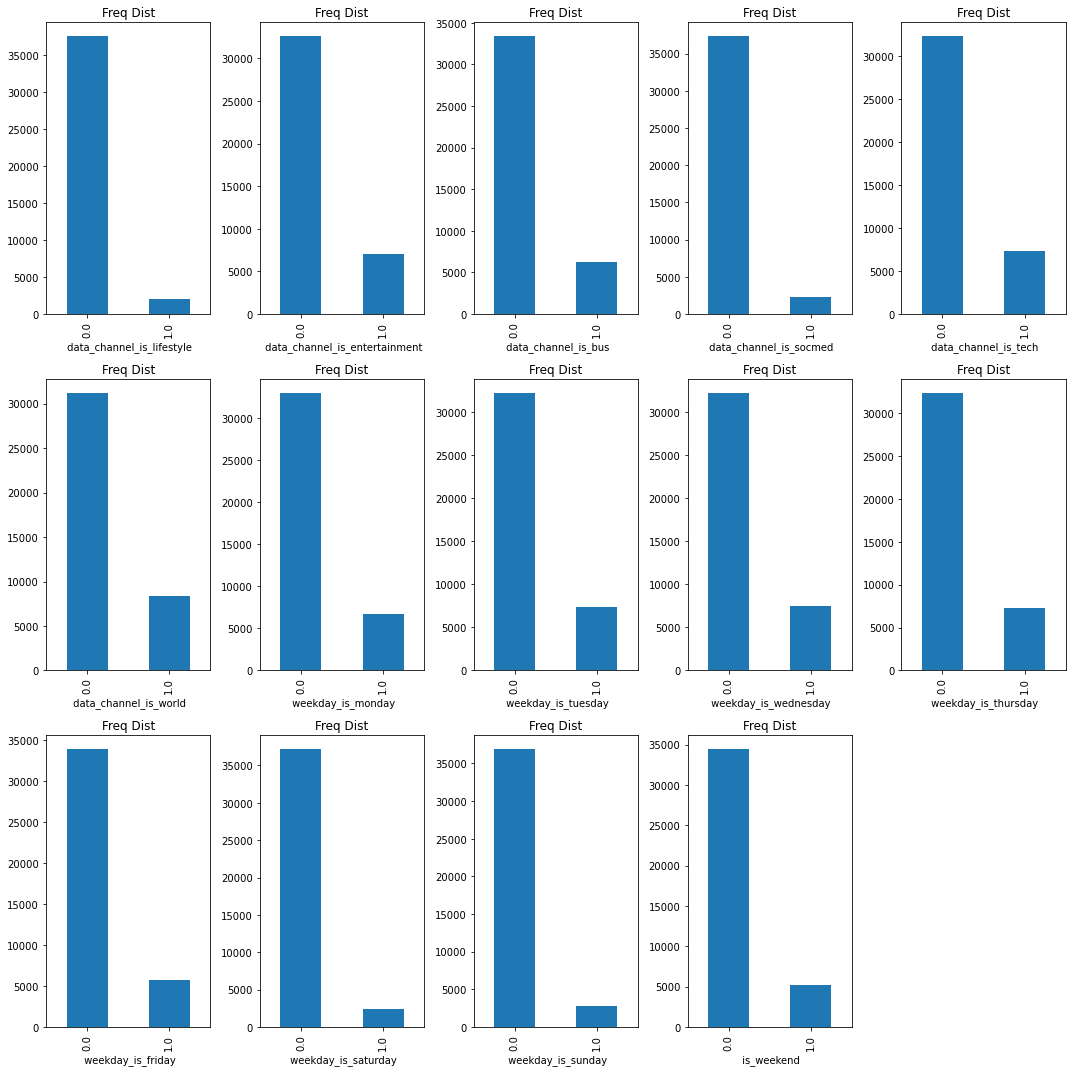

In [8]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(14):
    plt.subplot(3,5,i+1)
    data_cate[column2[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column2[i])
plt.tight_layout()

According to the above bar charts about each categorical data, we can divide them into two parts: one is what kind of the data_channel is and another is what weekdays the share of the article has happened. The number of zero is the most part of each bar chart. We can see from the first six charts that the environment, tech, and world take a big part of whole themes, then comes the topic of bus, finally there are lifestyle and socmed. Then according to the remaining bar charts, we get the conclusion that shares always happened on weekdays than the weekends.

In [9]:
#show the number of attributes and all rows
data_num.shape

(39644, 46)

In [10]:
#turn the name of numercial data columns into list
column3=data_num.columns.to_list()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

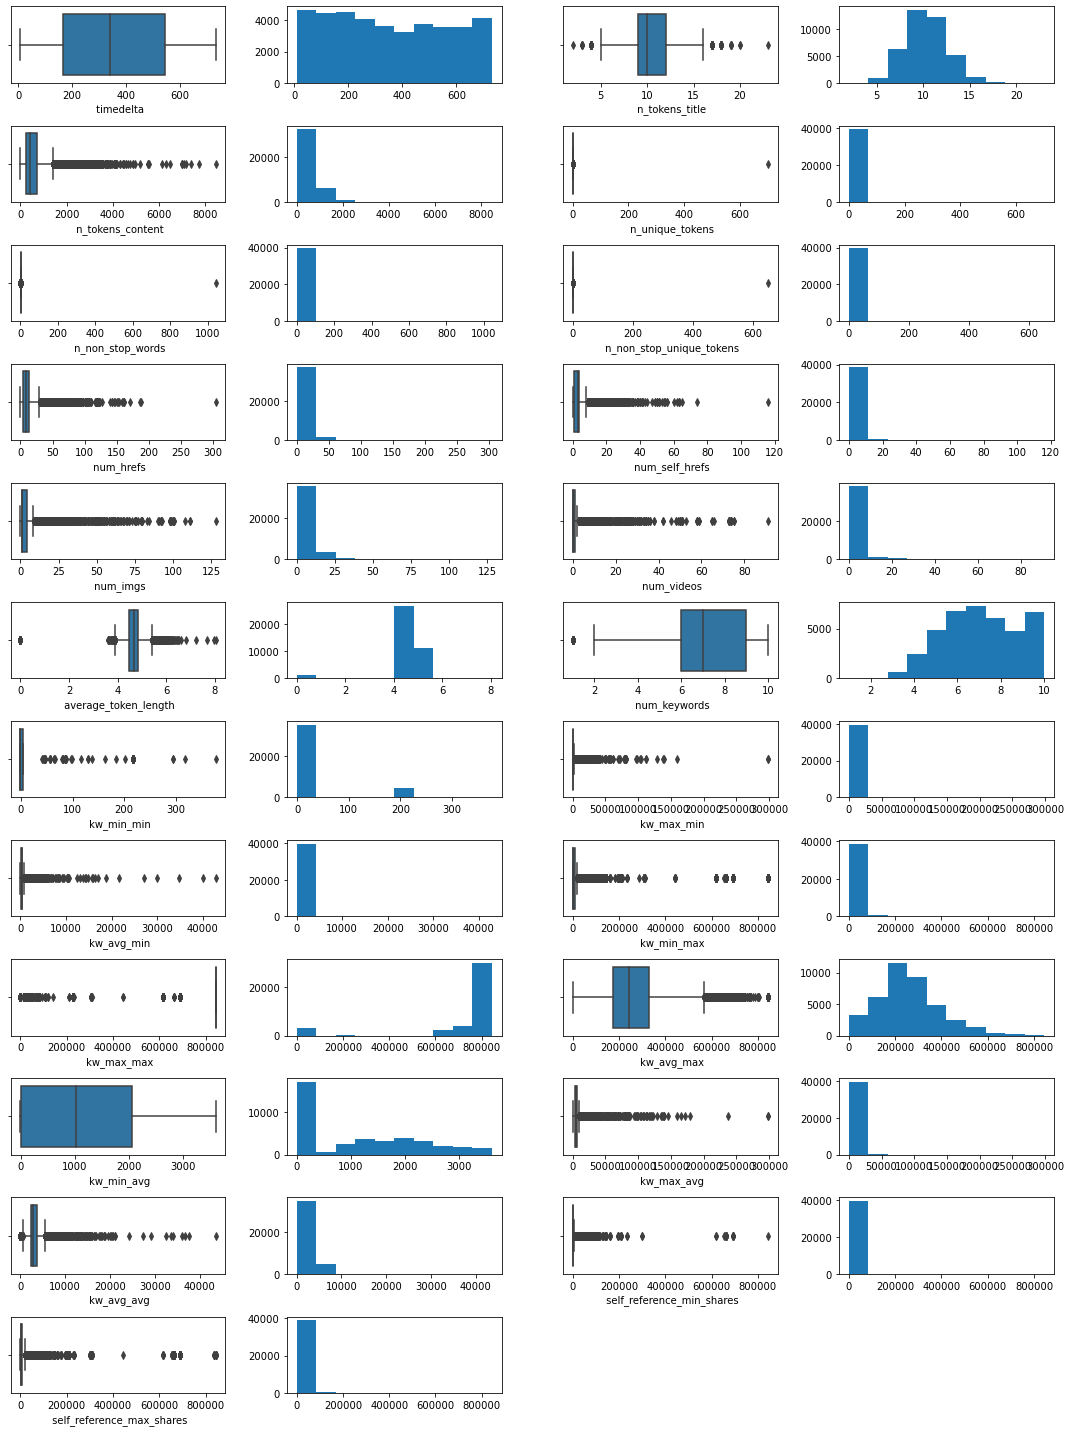

In [11]:
# put the histogram and barplot together to show the distribution of each attribute 
fig=plt.figure(figsize=(15,20))
for i in range(23):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data_num[column3[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data_num[column3[i]])
    
plt.tight_layout()

According to the above histograms and boxplots, we found that most columns are gathered at the smaller value bins, and some attributes like 'kw_avg_max', 'n_tokens_title', and num_keywords are nearly conformed to the normal distribution. There are three strange columns:'n_unique_tokens', 'n_non_stop_words', and 'n_non_stop_unique_tokens'. According to their boxplots, we can know these data nearly gathered together, in other words, they might have low variance.

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

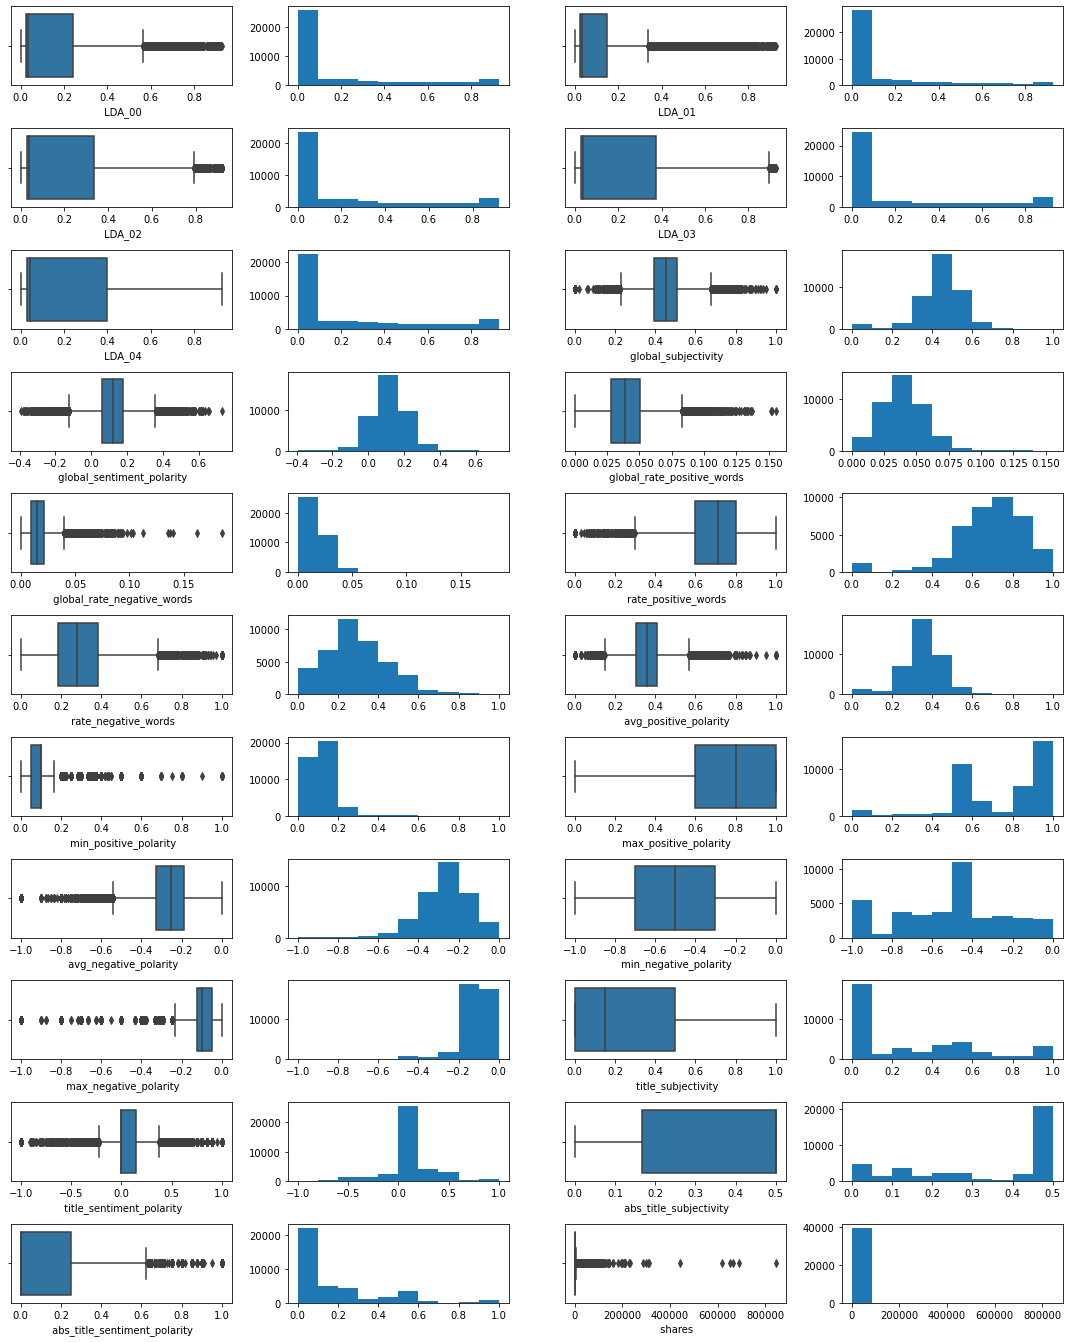

In [12]:
# put the histogram and barplot together to show the distribution of each attribute 
fig=plt.figure(figsize=(15,20))
for i in range(24,46):
    n=2*i
    plt.subplot(12,4,n-47)
    sns.boxplot(data_num[column3[i]])
    plt.subplot(12,4,n-46)
    plt.hist(data_num[column3[i]])
    
plt.tight_layout()

According to the above histograms and boxplots, we found that most columns are gathered at the smaller value bins, and some attributes like     'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', and 'avg_negatibe_polarity' nearly conform to the normal distribution. The charts about shares tell us that most of the shares have small values, some of which are unusually large values that have deviated from the mean value.

In [13]:
# set responsible variable as res 
# turn the column of data_cate into list
res=data[' shares']
data_cate2=pd.concat([data_cate,res],axis = 1)
column_cat=data_cate.columns.to_list()

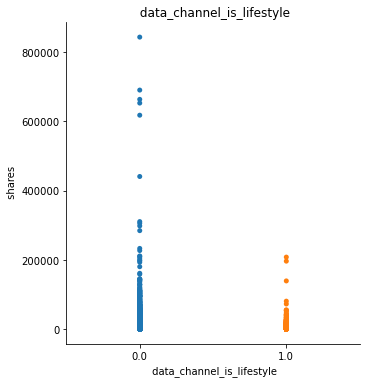

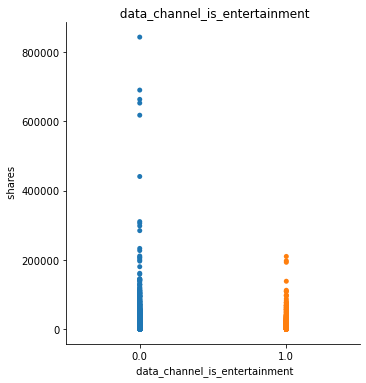

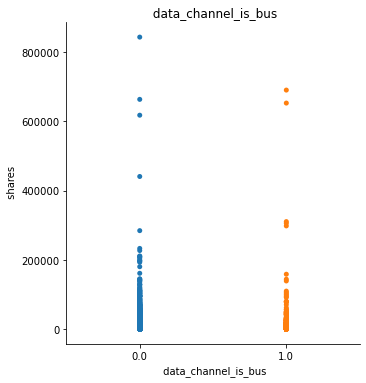

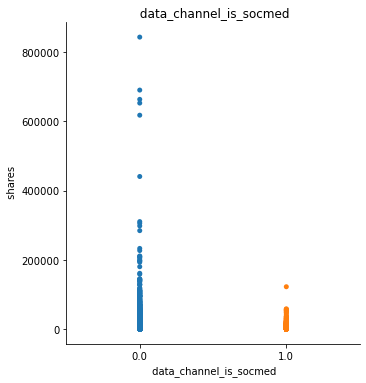

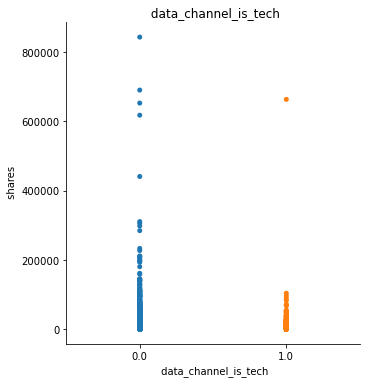

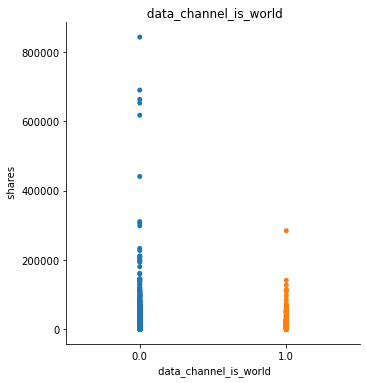

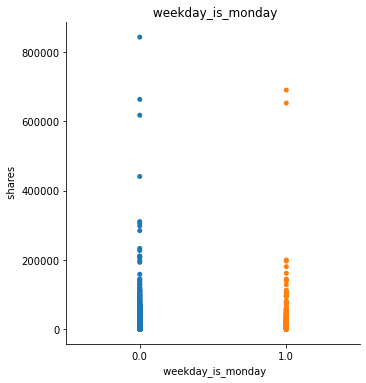

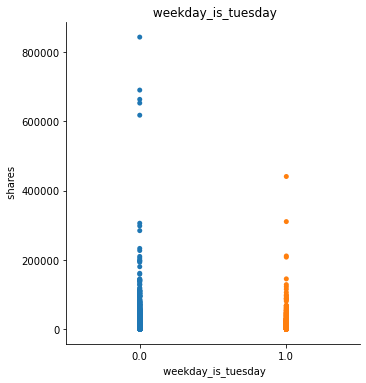

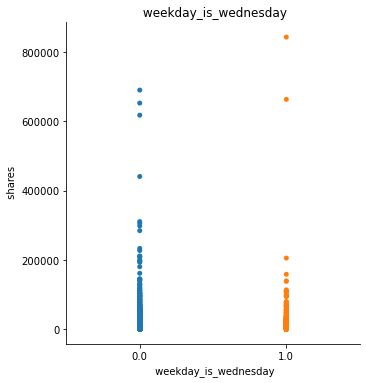

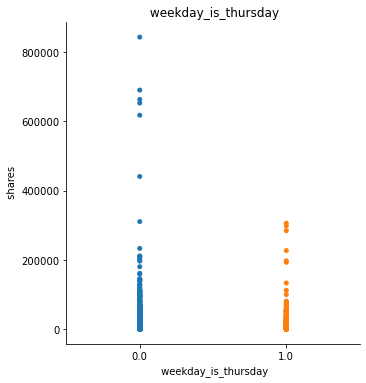

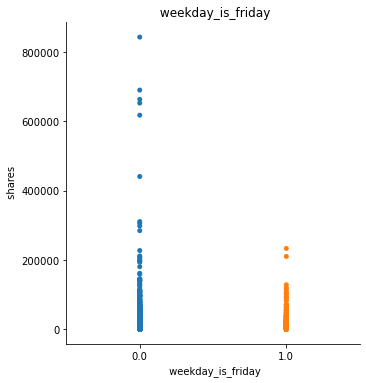

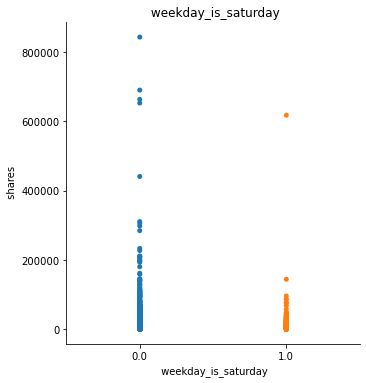

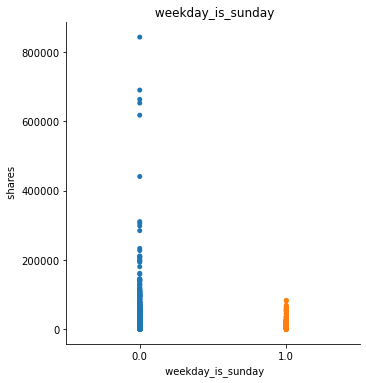

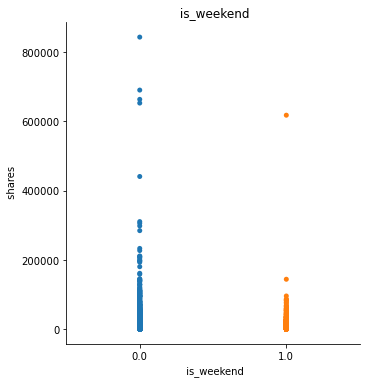

In [14]:
# show the relationship between categorical data and shares
%matplotlib inline
for i in range(14):  
    ax=sns.catplot(x=column_cat[i],y=res,jitter=False, data=data_cate2)
    plt.title(column_cat[i])
    plt.show()

As shown in the above catplot charts, we may find that:
- If the kind of data channel is world, socmed, and tech, there will be fewer shares. 
- When the data channel is bus or entertainment, the shares will perform better according to other types.
- According to the weekday, we can find that the sales performed better on weekdays.

Thus we may consider if it is the weekend and if the channel is the world as our categorical explanatory variables. 

In [15]:
data_num.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [16]:
#the correlation between each attributes 
data_num.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,0.130465,0.046884,0.591199,0.029503,0.133225,-0.076590,-0.637824,-0.493093,-0.157204,-0.051820,-0.163164,-0.011438,-0.014501,-0.015655,0.080894,0.004423,-0.141713,-0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.198654,-0.071968,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,-0.004440,0.002001,-0.000615,-0.000644,-0.000089,-0.002032,-0.002006,0.002510,-0.003694,-0.005944,0.000989,-0.000077,0.002009,0.000342,-0.000965,-0.004965,-0.009781,-0.002097,0.005498,0.002043,0.005002,0.002590,0.005258,0.001709,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,-0.043263,0.012844,0.008307,-0.020150,0.051265,-0.019269,0.058920,0.069692,0.121419,-0.004804,0.080394,0.025239,-0.020100,-0.053803,-0.012531,0.123786,-0.054977,0.203464,0.086859,0.056428,0.032515,0.101663,0.059817,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396

According to the correlation between attributes, we find that the correlation between a response variable and the explanatory variable is all weak and we can not choose the variable we want. Thus we are going to do dimensionality reduction in the next part.

## Data Preparation:  
  
In Data preparation we will first add the response variable 'share_level' and use labelencoder() to make it more suitable for a neural network model. We will apply standardization to numerical data. Then we will use PCA to reduce dimensions to get the numerical data and then based on the KNbest result we will finish feature selection and get the categorical data.

In [17]:
data2 = pd.concat([data_cate,data_num], axis = 1)
data2

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374

In [18]:
reg = data2[' shares'].values.tolist()

In [19]:
# extract the median percentage of 'dropout_pct'
reg.sort()
mid = int(len(reg) / 2)
if len(reg) % 2 == 0:
    median = (reg[mid-1] + reg[mid]) / 2.0
else:
    median = reg[mid]
print("The median percentage of dropout_pct is",median)

The median percentage of dropout_pct is 1400.0


In [20]:
# Create a new categorical variable 
def func(x):
    if x < 0.5*median:
        return "low"
    elif 0.5*median<x <1.5*median :
        return "medium"   
    else:
        return 'high'  

data2['share_level'] = data2[' shares'].apply(func)

In [21]:
# drop 'reg_pct' and 'reg_cnt'
data2.drop([' shares'],axis=1,inplace=True)

In [22]:
data2

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,share_level
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,low
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,medium
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,medium
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,medium
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,medium
39640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.029349,0.028575,0.231866,0.681635,0.0

In [23]:
data2_num = data2.iloc[:,14:59]
data2_num

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,

In [24]:
# load stadardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
# finish standardization
scaler = StandardScaler()
scaler.fit(data2[[' timedelta',' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',' abs_title_sentiment_polarity']])
df_nums = pd.DataFrame(scaler.transform(data2[[' timedelta',' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',' abs_title_sentiment_polarity']]),columns = [' timedelta',' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',' abs_title_sentiment_polarity'])
df_nums

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.757880,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,1.757880,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,1.757880,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,1.757880,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.757880,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-1.618083,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,0.406595,-0.389285,-0.125184,-0.224303,0.229155,0.424131,0.856255,1.228718,-0.271016,-0.079463,0.374966,0.918194,1.265194,-0.606763,-0.529143,-0.229033,-0.673368,1.864691,0.336881,0.233727,-0.117772,-0.199605,0.210679,-0.065037,-0.191635,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658
39640,-1.618083,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,-0.169058,-0.117210,-0.389285,-0.139440,-0.206785,-0.122658,0.424131,-0.490718,0.481010,-0.030669,0.209237,-0.096196,-0.200580,-0.177675,-0.590370,-0.512874,0.055097,1.551102,-0.710471,1.037031,0.773140,0.000534,-0.689510,0.685316,-0.643170,0.200881,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729

In [25]:
data2[' timedelta'] = df_nums[' timedelta']
data2[' n_tokens_title'] = df_nums[' n_tokens_title']
data2[' n_tokens_content'] = df_nums[' n_tokens_content']
data2[' n_unique_tokens'] = df_nums[' n_unique_tokens']
data2[' n_non_stop_words'] = df_nums[' n_non_stop_words']
data2[' n_non_stop_unique_tokens'] = df_nums[' n_non_stop_unique_tokens']
data2[' num_hrefs'] = df_nums[' num_hrefs']
data2[' num_self_hrefs'] = df_nums[' num_self_hrefs']
data2[' num_imgs'] = df_nums[' num_imgs']
data2[' num_videos'] = df_nums[' num_videos']
data2[' average_token_length'] = df_nums[' average_token_length']
data2[' num_keywords'] = df_nums[' num_keywords']
data2[' kw_min_min'] = df_nums[' kw_min_min']
data2[' kw_max_min'] = df_nums[' kw_max_min']
data2[' kw_avg_min'] = df_nums[' kw_avg_min']
data2[' kw_min_max'] = df_nums[' kw_min_max']
data2[' kw_max_max'] = df_nums[' kw_max_max']
data2[' kw_avg_max'] = df_nums[' kw_avg_max']
data2[' kw_min_avg'] = df_nums[' kw_min_avg']
data2[' kw_max_avg'] = df_nums[' kw_max_avg']
data2[' kw_avg_avg'] = df_nums[' kw_avg_avg']
data2[' self_reference_min_shares'] = df_nums[' self_reference_min_shares']
data2[' self_reference_max_shares'] = df_nums[' self_reference_max_shares']
data2[' self_reference_avg_sharess'] = df_nums[' self_reference_avg_sharess']
data2[' LDA_00'] = df_nums[' LDA_00']
data2[' LDA_01'] = df_nums[' LDA_01']
data2[' LDA_02'] = df_nums[' LDA_02']
data2[' LDA_03'] = df_nums[' LDA_03']
data2[' LDA_04'] = df_nums[' LDA_04']
data2[' global_subjectivity'] = df_nums[' global_subjectivity']
data2[' global_sentiment_polarity'] = df_nums[' global_sentiment_polarity']
data2[' global_rate_positive_words'] = df_nums[' global_rate_positive_words']
data2[' global_rate_negative_words'] = df_nums[' global_rate_negative_words']
data2[' rate_positive_words'] = df_nums[' rate_positive_words']
data2[' rate_negative_words'] = df_nums[' rate_negative_words']
data2[' avg_positive_polarity'] = df_nums[' avg_positive_polarity']
data2[' min_positive_polarity'] = df_nums[' min_positive_polarity']
data2[' max_positive_polarity'] = df_nums[' max_positive_polarity']
data2[' avg_negative_polarity'] = df_nums[' avg_negative_polarity']
data2[' min_negative_polarity'] = df_nums[' min_negative_polarity']
data2[' max_negative_polarity'] = df_nums[' max_negative_polarity']
data2[' title_subjectivity'] = df_nums[' title_subjectivity']
data2[' title_sentiment_polarity'] = df_nums[' title_sentiment_polarity']
data2[' abs_title_subjectivity'] = df_nums[' abs_title_subjectivity']
data2[' abs_title_sentiment_polarity'] = df_nums[' abs_title_sentiment_polarity']

**Dimensionality Reduction (PCA) and Feature selection**

We firstly apply the SelectKbest and f_classif to select the top 10 numerical data. Then we have tried n_components as 10, when the value of n_components is 10, we found the whole added variance value can not reach more than 0.8, the same thing happened in this case when the n_components is set as 8. And when we use 10 to test found set n_components as 6 is the best choice to do the PCA.

In [26]:
from sklearn import decomposition
from sklearn.preprocessing import scale

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
Select=SelectKBest(f_classif, k=10)
fit=Select.fit(df_nums, data2['share_level'])
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(df_nums.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
featureScores.sort_values(by="Score" , ascending=False).head(10)

,Features,Score
20,kw_avg_avg,700.641670
26,LDA_02,464.555778
18,kw_min_avg,211.268220
6,num_hrefs,180.167140
27,LDA_03,153.058742
19,kw_max_avg,148.157109
8,num_imgs,118.543049
28,LDA_04,110.825272
23,self_reference_avg_sharess,102.089189
0,timedelta,90.109996


In [28]:
df_nums = data2[[' kw_avg_avg',' LDA_02',' kw_min_avg',' num_hrefs',' LDA_03',' kw_max_avg',' num_imgs',' self_reference_avg_sharess',' timedelta']]

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)

In [30]:
x = df_nums.copy()
# fit the dataset 
pca=pca.fit(x)

In [31]:
# get the variance to find best value for n_components
var=pca.explained_variance_ratio_

According to the acceptable value of the variance, we learn from the link as below. So we are going to set the threshold of the variance as 80%.
https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/

In [32]:
# Use for loop to add up variance value
# If the sum values meet the 
sum=0
for i in range(20):
    sum=sum+var[i]
    if sum> 0.8:
        break
print('the best n_components_is',i+1)

the best n_components_is 6


In [33]:
# Show the dataframe after PCA work
pca = PCA(n_components = 6)
pca=pca.fit(df_nums)
df_pca=pca.transform(df_nums)
df_pca2= pd.DataFrame(df_pca, columns=['column1', 'column2', 'column3','column4','column5', 'column6'])
df_pca2

,column1,column2,column3,column4,column5,column6
0,-2.638183,-0.743365,-1.889032,0.260876,-0.196801,0.219083
1,-2.654599,-0.696072,-1.902656,0.228853,-0.181206,0.192298
2,-2.654903,-0.688399,-1.925274,0.250660,-0.219379,0.205136
3,-3.014076,-0.716916,-0.783432,0.751416,0.153423,0.565026
4,-1.904250,-2.865075,-0.950703,0.816260,-0.277842,0.244614
...,...,...,...,...,...,...
39639,0.269785,1.073620,1.108542,-0.445951,-1.757726,0.081566
39640,0.929438,0.342933,0.711364,-1.276876,-0.282588,-1.198764
39641,2.021045,-0.962611,1.012308,-0.959821,-0.157391,-0.967772
39642,-1.905186,0.699471,2.150823,0.271890,0.395193,-0.983064


In [34]:
data2_cate = data2.iloc[:,:14]
data2_cate

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


We are going to use SelectKbest and chi2 to do the feature selection. After selection, we will get the top 2 categorical data.

In [35]:
# choose top 2 categorical data
from sklearn.feature_selection import SelectKBest, chi2
Select=SelectKBest(chi2, k=10)
fit2=Select.fit(data2_cate, data2['share_level'])
scores2 = pd.DataFrame(fit2.scores_)
columns2 = pd.DataFrame(data2_cate.columns)
featureScores2 = pd.concat([columns2,scores2],axis=1)
featureScores2.columns = ['Features','Score']
featureScores2.sort_values(by="Score" , ascending=False).head(2)

,Features,Score
5,data_channel_is_world,660.839347
13,is_weekend,580.508584


In [36]:
df_pca2

,column1,column2,column3,column4,column5,column6
0,-2.638183,-0.743365,-1.889032,0.260876,-0.196801,0.219083
1,-2.654599,-0.696072,-1.902656,0.228853,-0.181206,0.192298
2,-2.654903,-0.688399,-1.925274,0.250660,-0.219379,0.205136
3,-3.014076,-0.716916,-0.783432,0.751416,0.153423,0.565026
4,-1.904250,-2.865075,-0.950703,0.816260,-0.277842,0.244614
...,...,...,...,...,...,...
39639,0.269785,1.073620,1.108542,-0.445951,-1.757726,0.081566
39640,0.929438,0.342933,0.711364,-1.276876,-0.282588,-1.198764
39641,2.021045,-0.962611,1.012308,-0.959821,-0.157391,-0.967772
39642,-1.905186,0.699471,2.150823,0.271890,0.395193,-0.983064


According to the feature selection result, we choose the numerical variables from the PCA transformation of top 10 numerical in selectKbest result and  'data_channel_is_world', 'is_weekend' as our categorical explanatory variables.

## Prepped Data Review:

<AxesSubplot:title={'center':'share_level'}>

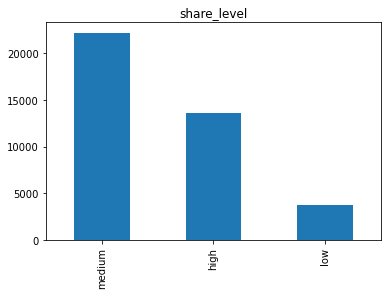

In [37]:
# use counterplot to show the distribution of the share_level 
data2['share_level'].value_counts().plot.bar(title = "share_level")

- As shown in the above bar chart, we may know that there are three kinds of dropout level which is categorized by the 'dropout_pct': High, low, and medium.
- The high level has the highest number among these three, which equals nearly 15000, and next comes the low level is about 13000, the attribute of 'medium' have the least number equals to less than 12000.

In [38]:
# turn the name of categorical columns into list
reg2=data2['share_level']
data_cate3=pd.concat([data_cate,reg2],axis = 1)
column_cat=data_cate.columns.to_list()

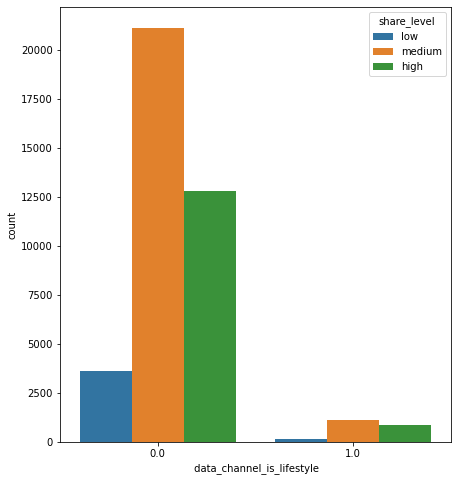

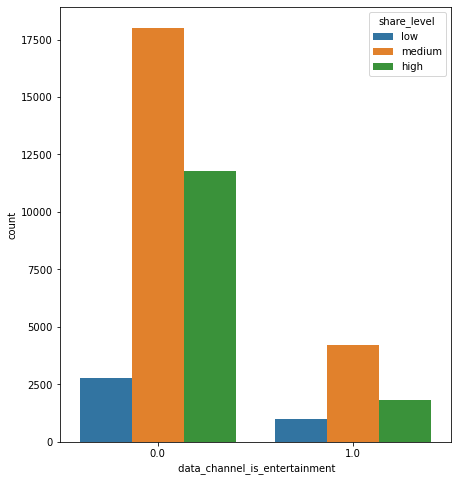

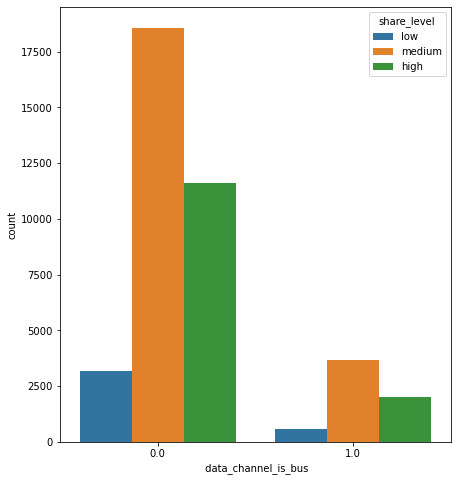

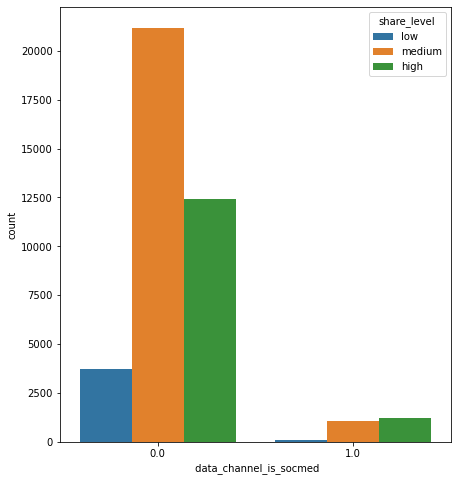

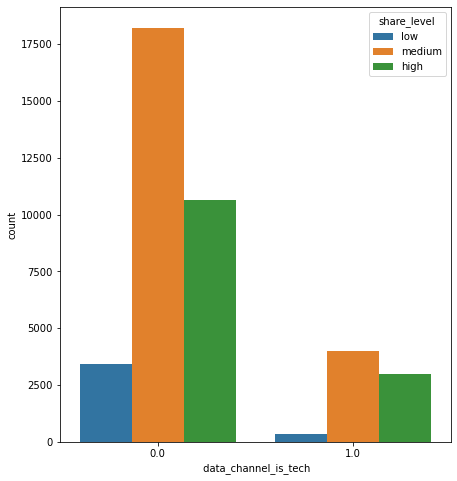

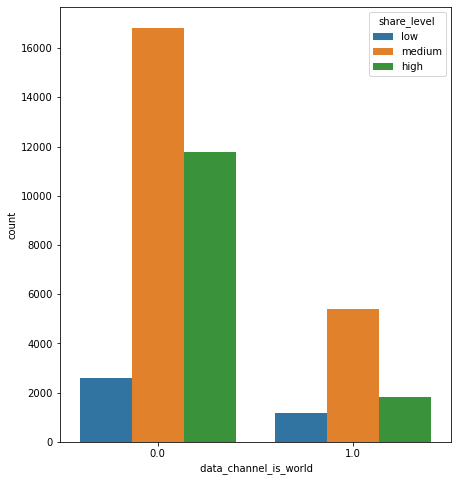

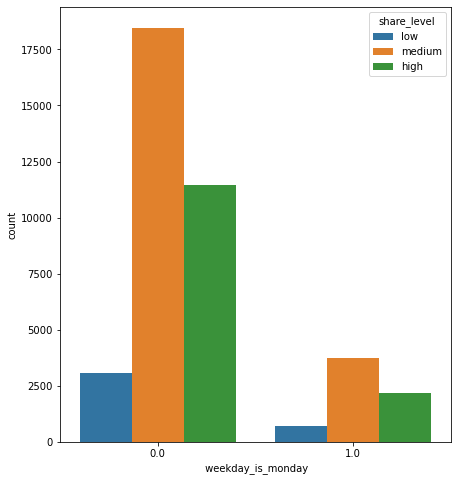

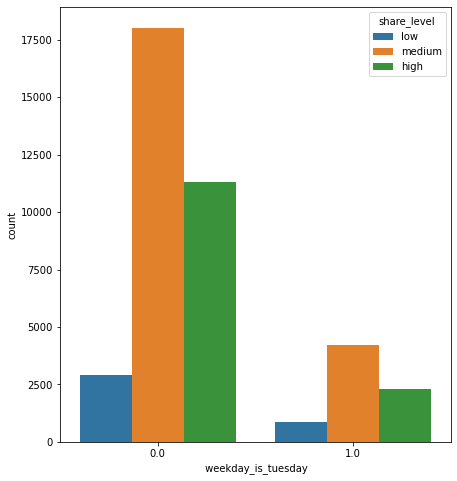

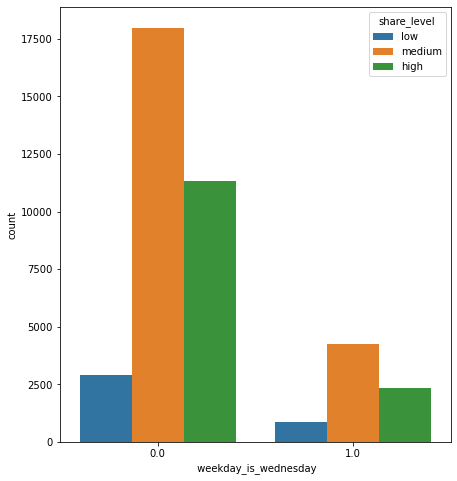

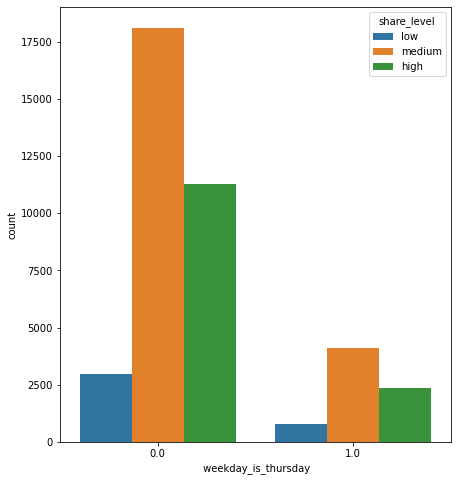

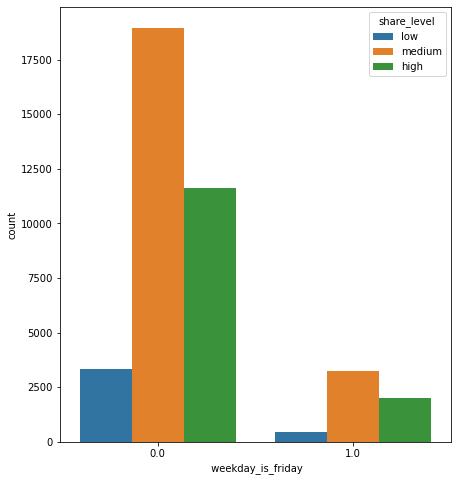

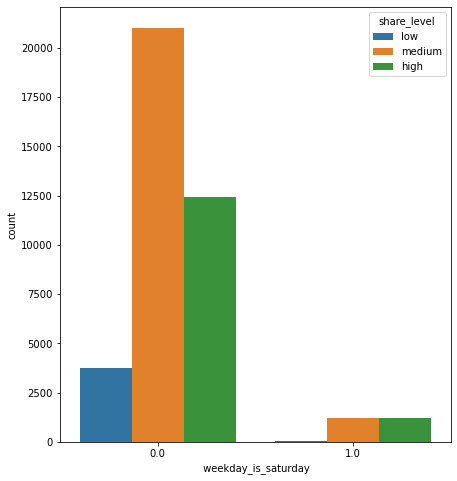

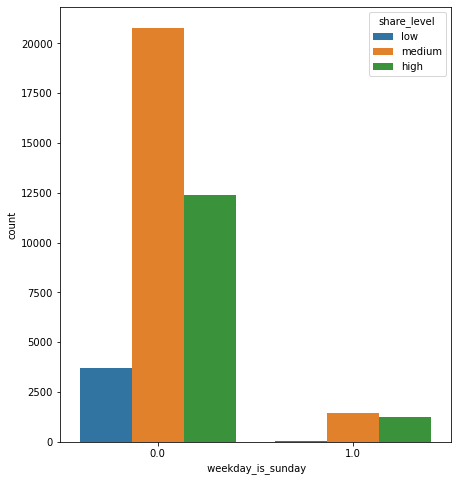

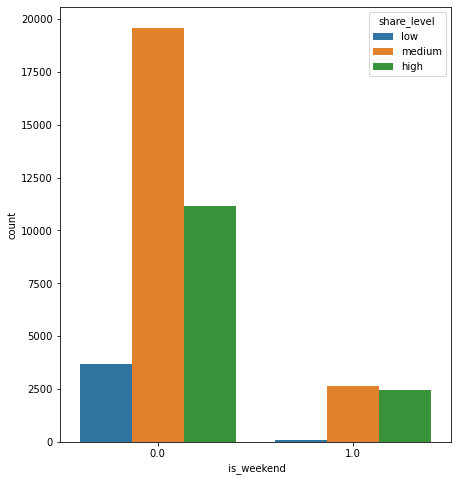

In [39]:
# show the relationship between categorical data and responsible variable 'share_level'
for col in column_cat:
    plt.figure(figsize=(7,8))
    sns.countplot(x=col,hue=reg2,data=data2)

According to the above count plot, we may find that:
- In the relationship between most categorical attributes and explained variables, the 'medium' part has the most number except for the 'weekday_is_saturday' and 'data_channel_is_socmed'
- The number of sales performed better on weekdays than weekends. And the number of 'medium' and 'high' is similar on weekends, the number of 'low' is very few.
- As for the 'data_channel_is_world', we can learn from that the number of 'medium' has more than 5000

Thus we may consider if it is the weekend and if the channel is the world as our categorical explanatory variables. 


## Neural Network Modeling:

In [40]:
import keras_metrics
from tensorflow import keras
from keras import models
from keras import layers
from sklearn.model_selection import cross_val_score 

We also used the label encoder to turn our response variable to the data type that fi in neural network models.

In [41]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
data2['share_level'] = model.fit_transform(data2['share_level']) 

In [42]:
df_pca2['is_weekend']=data2[' is_weekend']
df_pca2['data_channel_is_world']=data2[' data_channel_is_world']

In [43]:
# load and finish train test split
from sklearn.model_selection import train_test_split
X = df_pca2.copy()
Y = data2.share_level
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

We need to calculate the null_value_rate before performing model work

In [90]:
data3=data2.loc[X_train.index]
pd.value_counts(data3['share_level'])
print('null_value_rate is:',16663/len(X_train))

null_value_rate is: 0.5604210809538224


In [44]:
X_train.shape

(29733, 8)

In [45]:
Y_train = keras.utils.to_categorical(Y_train, 3)
Y_test = keras.utils.to_categorical(Y_test, 3)

We learned from the link below so we are going to use the method of GridsearchCV to find the best batch_size and epochs
https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [56]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
   # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [57]:
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-57-7b0f05354f25>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [58]:
# set up dictionaries to store different values for batch_size and epochs
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
# build model to find best value for each two hyperparameter
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
grid_result.best_score_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.588572 using {'batch_size': 10, 'epochs': 50}


 
  
**Activation: relu, sigmoid, and softmax**  
Three activation functions we may want to consider for use in hidden layers; they are:  
Rectified Linear Activation (ReLU)  
Logistic (Sigmoid)  
Hyperbolic Tangent (Tanh)

Three activation functions we may want ot consider for use in output layers:  
Linear  
Logistic (Sigmoid)  
Softmax  

**relu**:Rectified Linear Unit activation function.With default values, it returns element-wise max(x, 0).  
**tanh**: Hyperbolic Tangent (Tanh)  
**softmax**:Softmax converts a vector of values to a probability distribution. The elements of the output vector are in range (0, 1) and sum to 1. Each vector is handled independently. The axis argument sets which axis of the input the function is applied along. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.  
**sigmoid**:Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).Applies the sigmoid activation function. For small values (<-5), the sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1. Sigmoid is equivalent to a 2-element Softmax, where the second element is assumed to be zero. The sigmoid function always returns a value between 0 and 1.  
  
As for the hyperparameters

- There are no specific difference between 'categorical_crossentropy' and 'Sparse Categorical Cross Entropy', they can all be used when there are two or more label classes. Here we are going to use categorical_crossentropy as our loss function
- As for the hyperparameter, Adam combines the good properties of Adadelta and RMSprop and hence tend to do better for most of the problems, thus we are going to use it as our optimizer for model 1, 2, 3.
- We use metrics of accuracy, f1_score, precision and recall to evaluate the comprehensive index of the models.
  

  


**Model 1:**
**Activation: relu, tanh, and softmax**

For model1, we choose the relu & tanh as hidden layers because our input layers include both categorical data and numerical data. The reason we choose softmax as the output layer is because we want to compare the performance of sigmoid and softmax to the data we have. The responsible variable is made up of three types, so in the output, we choose 3 as our Neurons.

In [59]:
model1 = models.Sequential([
    layers.Flatten(input_shape = [8,1]),
    layers.Dense(100, activation = "relu"),
    layers.Dense(50, activation = "tanh"),
    layers.Dense(3, activation = "softmax")
])

In [60]:
model1.compile(loss="categorical_crossentropy",
              optimizer= 'adam',
              metrics=["accuracy", keras_metrics.f1_score(), keras_metrics.precision(), keras_metrics.recall()])

In [61]:
X_v = X_train[:2000]
Y_v = Y_train[:2000]

We use 2000 samples of training data as the validation data.  
For epochs, we choose to set epochs as 50 and batch_size as 10 because of the result of the GridSearchCV 

In [62]:
rm1 = model1.fit(X_train, Y_train, epochs = 50, batch_size = 10, validation_data = (X_v, Y_v))

Epoch 1/50


D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


2973/2974 [============================>.] - ETA: 0s - loss: 0.8739 - accuracy: 0.5813 - f1_score: 0.2784 - precision: 0.5292 - recall: 0.1918WARNING:tensorflow:`add_update` `inputs` kwarg has been deprecated. You no longer need to pass a value to `inputs` as it is being automatically inferred.


D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


2974/2974 [==============================] - 4s 1ms/step - loss: 0.8739 - accuracy: 0.5813 - f1_score: 0.2784 - precision: 0.5292 - recall: 0.1918 - val_loss: 0.8643 - val_accuracy: 0.5730 - val_f1_score: 0.3319 - val_precision: 0.5484 - val_recall: 0.2379
Epoch 2/50
2974/2974 [==============================] - 3s 883us/step - loss: 0.8612 - accuracy: 0.5852 - f1_score: 0.3398 - precision: 0.5521 - recall: 0.2455 - val_loss: 0.8618 - val_accuracy: 0.5810 - val_f1_score: 0.3473 - val_precision: 0.5526 - val_recall: 0.2532
Epoch 3/50
2974/2974 [==============================] - 3s 884us/step - loss: 0.8580 - accuracy: 0.5879 - f1_score: 0.3518 - precision: 0.5540 - recall: 0.2578 - val_loss: 0.8565 - val_accuracy: 0.5850 - val_f1_score: 0.3550 - val_precision: 0.5548 - val_recall: 0.2610
Epoch 4/50
2974/2974 [==============================] - 3s 933us/step - loss: 0.8551 - accuracy: 0.5878 - f1_score: 0.3577 - precision: 0.5552 - recall: 0.2638 - val_loss: 0.8516 - val_accuracy: 0.5900 -

**Model 2:**  
  
**Activation: tanh, tanh, and softmax**

For model 2, we choose the apply 2 tanh hidden layers because we want to check the performance of tanh with relu and sigmoid. So we also choose the softmax as model 2's output layer.  

In [63]:
model2 = models.Sequential([
    layers.Flatten(input_shape = [8,1]),
    layers.Dense(100, activation = "tanh"),
    layers.Dense(50, activation = "tanh"),
    layers.Dense(3, activation = "softmax")
])

In [64]:
model2.compile(loss="categorical_crossentropy",
              optimizer= 'adam',
              metrics=["accuracy", keras_metrics.f1_score(), keras_metrics.precision(), keras_metrics.recall()])

We use 2000 samples of training data as the validation data.  
For epochs, we choose to set epochs as 50 and batch_size as 10 because of the result of the GridSearchCV 

In [65]:
rm2 = model2.fit(X_train, Y_train, epochs = 50, batch_size = 10, validation_data = (X_v, Y_v))

Epoch 1/50


D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


2916/2974 [============================>.] - ETA: 0s - loss: 0.8809 - accuracy: 0.5737 - f1_score: 0.2944 - precision: 0.5082 - recall: 0.2077WARNING:tensorflow:`add_update` `inputs` kwarg has been deprecated. You no longer need to pass a value to `inputs` as it is being automatically inferred.


D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


2974/2974 [==============================] - 4s 1ms/step - loss: 0.8814 - accuracy: 0.5731 - f1_score: 0.2949 - precision: 0.5086 - recall: 0.2082 - val_loss: 0.8698 - val_accuracy: 0.5805 - val_f1_score: 0.3212 - val_precision: 0.5287 - val_recall: 0.2307
Epoch 2/50
2974/2974 [==============================] - 3s 922us/step - loss: 0.8652 - accuracy: 0.5832 - f1_score: 0.3318 - precision: 0.5361 - recall: 0.2403 - val_loss: 0.8689 - val_accuracy: 0.5840 - val_f1_score: 0.3404 - val_precision: 0.5411 - val_recall: 0.2483
Epoch 3/50
2974/2974 [==============================] - 3s 979us/step - loss: 0.8626 - accuracy: 0.5850 - f1_score: 0.3434 - precision: 0.5428 - recall: 0.2511 - val_loss: 0.8632 - val_accuracy: 0.5800 - val_f1_score: 0.3471 - val_precision: 0.5450 - val_recall: 0.2546
Epoch 4/50
2974/2974 [==============================] - 3s 1ms/step - loss: 0.8605 - accuracy: 0.5846 - f1_score: 0.3504 - precision: 0.5456 - recall: 0.2580 - val_loss: 0.8598 - val_accuracy: 0.5765 - v

**Model 3:**  
  
**Activation: relu, sigmoid, and sigmoid**

For model 3, we choose the same hidden layers as model 1. We choose sigmoid as our output layer to compare the performance of sigmoid with the performance of softmax. 

In [66]:
model3 = models.Sequential([
    layers.Flatten(input_shape = [8,1]),
    layers.Dense(100, activation = "relu"),
    layers.Dense(50, activation = "sigmoid"),
    layers.Dense(3, activation = "sigmoid")
])

In [67]:
model3.compile(loss="categorical_crossentropy",
              optimizer= 'adam',
              metrics=["accuracy", keras_metrics.f1_score(), keras_metrics.precision(), keras_metrics.recall()])

We use 2000 samples of training data as the validation data.  
For epochs, we choose to set epochs as 50 and batch_size as 10 because of the result of the GridSearchCV 

In [68]:
rm3 = model3.fit(X_train, Y_train, epochs = 50, batch_size = 10, validation_data = (X_v, Y_v))

Epoch 1/50


D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


2912/2974 [============================>.] - ETA: 0s - loss: 0.8718 - accuracy: 0.5808 - f1_score: 0.5331 - precision: 0.3866 - recall: 0.8624WARNING:tensorflow:`add_update` `inputs` kwarg has been deprecated. You no longer need to pass a value to `inputs` as it is being automatically inferred.


D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


2974/2974 [==============================] - 4s 1ms/step - loss: 0.8720 - accuracy: 0.5809 - f1_score: 0.5334 - precision: 0.3869 - recall: 0.8625 - val_loss: 0.8663 - val_accuracy: 0.5800 - val_f1_score: 0.5463 - val_precision: 0.3997 - val_recall: 0.8625
Epoch 2/50
2974/2974 [==============================] - 3s 968us/step - loss: 0.8598 - accuracy: 0.5863 - f1_score: 0.5491 - precision: 0.4037 - recall: 0.8579 - val_loss: 0.8614 - val_accuracy: 0.5760 - val_f1_score: 0.5501 - val_precision: 0.4056 - val_recall: 0.8546
Epoch 3/50
2974/2974 [==============================] - 3s 983us/step - loss: 0.8580 - accuracy: 0.5880 - f1_score: 0.5511 - precision: 0.4071 - recall: 0.8530 - val_loss: 0.8557 - val_accuracy: 0.5850 - val_f1_score: 0.5520 - val_precision: 0.4078 - val_recall: 0.8543
Epoch 4/50
2974/2974 [==============================] - 3s 867us/step - loss: 0.8556 - accuracy: 0.5874 - f1_score: 0.5528 - precision: 0.4084 - recall: 0.8550 - val_loss: 0.8572 - val_accuracy: 0.5865 -

## Select Models:

**Model Evaluations:**

In [69]:
model1.evaluate(X_test, Y_test)

  1/310 [..............................] - ETA: 1:17 - loss: 0.9282 - accuracy: 0.5938 - f1_score: 0.4012 - precision: 0.5807 - recall: 0.3064

D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


310/310 [==============================] - 1s 1ms/step - loss: 0.8513 - accuracy: 0.5896 - f1_score: 0.4010 - precision: 0.5807 - recall: 0.3063


[0.8513152003288269,
 0.5896478891372681,
 0.4010341167449951,
 0.5806648135185242,
 0.3062843680381775]

This model has an accuracy of 58.96%, f1_score of 40.10% , precision of 58.06%, and recall of 30.63%.

In [70]:
model2.evaluate(X_test, Y_test)

D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


310/310 [==============================] - 1s 1ms/step - loss: 0.8525 - accuracy: 0.5916 - f1_score: 0.4008 - precision: 0.5718 - recall: 0.3086: 0s - loss: 0.8509 - accuracy: 0.5930 - f1_score: 0.4008 - precision: 0.5718 - recall: 


[0.8525390625,
 0.591564953327179,
 0.4008256494998932,
 0.5717608332633972,
 0.3085736930370331]

This model has an accuracy of 59.15%, f1_score of 40.08%, precision of 57.17%, and recall of 30.86%.

In [71]:
model3.evaluate(X_test, Y_test)

D:\python\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


310/310 [==============================] - 1s 1ms/step - loss: 0.8540 - accuracy: 0.5903 - f1_score: 0.5656 - precision: 0.4386 - recall: 0.7960


[0.8540236353874207,
 0.5902532339096069,
 0.565580427646637,
 0.4386172890663147,
 0.7959896922111511]

This model has an accuracy score of 59.03%, f1_score of 56.56%, precision of 43.86%, and recall of 79.60%.

| Metric         | Model 1 | Model 2   | Model 3 
| -------------  | ------- | -------   |------    
| Accuracy       | 58.96%  | 59.15%    | 59.03%  
| F1 Score       | 40.10%  |40.08%    | 56.56%        
| Precision      | 58.06%  | 57.17%    | 43.86%   
| Recall         | 30.63%  | 30.86%    | 79.60%   
| Null_value_rate|56.04%|56.04%|56.04%|56.04%

According to the model evaluation result, we can see that these 3 models have similar accuracy. Model 3 has the highest F1 score and re-call among these 3 models. So our preferred model is model 3.

## Conclusions:

In this assignment, we compared the performance of different neural network models for this dataset. Finally, we found out that the model with sigmoid as a hidden layer and output layer has the best performance.